In [1]:
! pip install ultralytics

In [12]:
from ultralytics import YOLO
import cv2
import os
from IPython.display import display, Image
import glob

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TafTnLjXkvLUpxGZP8JU")
project = rf.workspace("id-card-vf1zl").project("idcardiran-tcuzs")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [4]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 191MB/s]
Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/IDCardIran-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

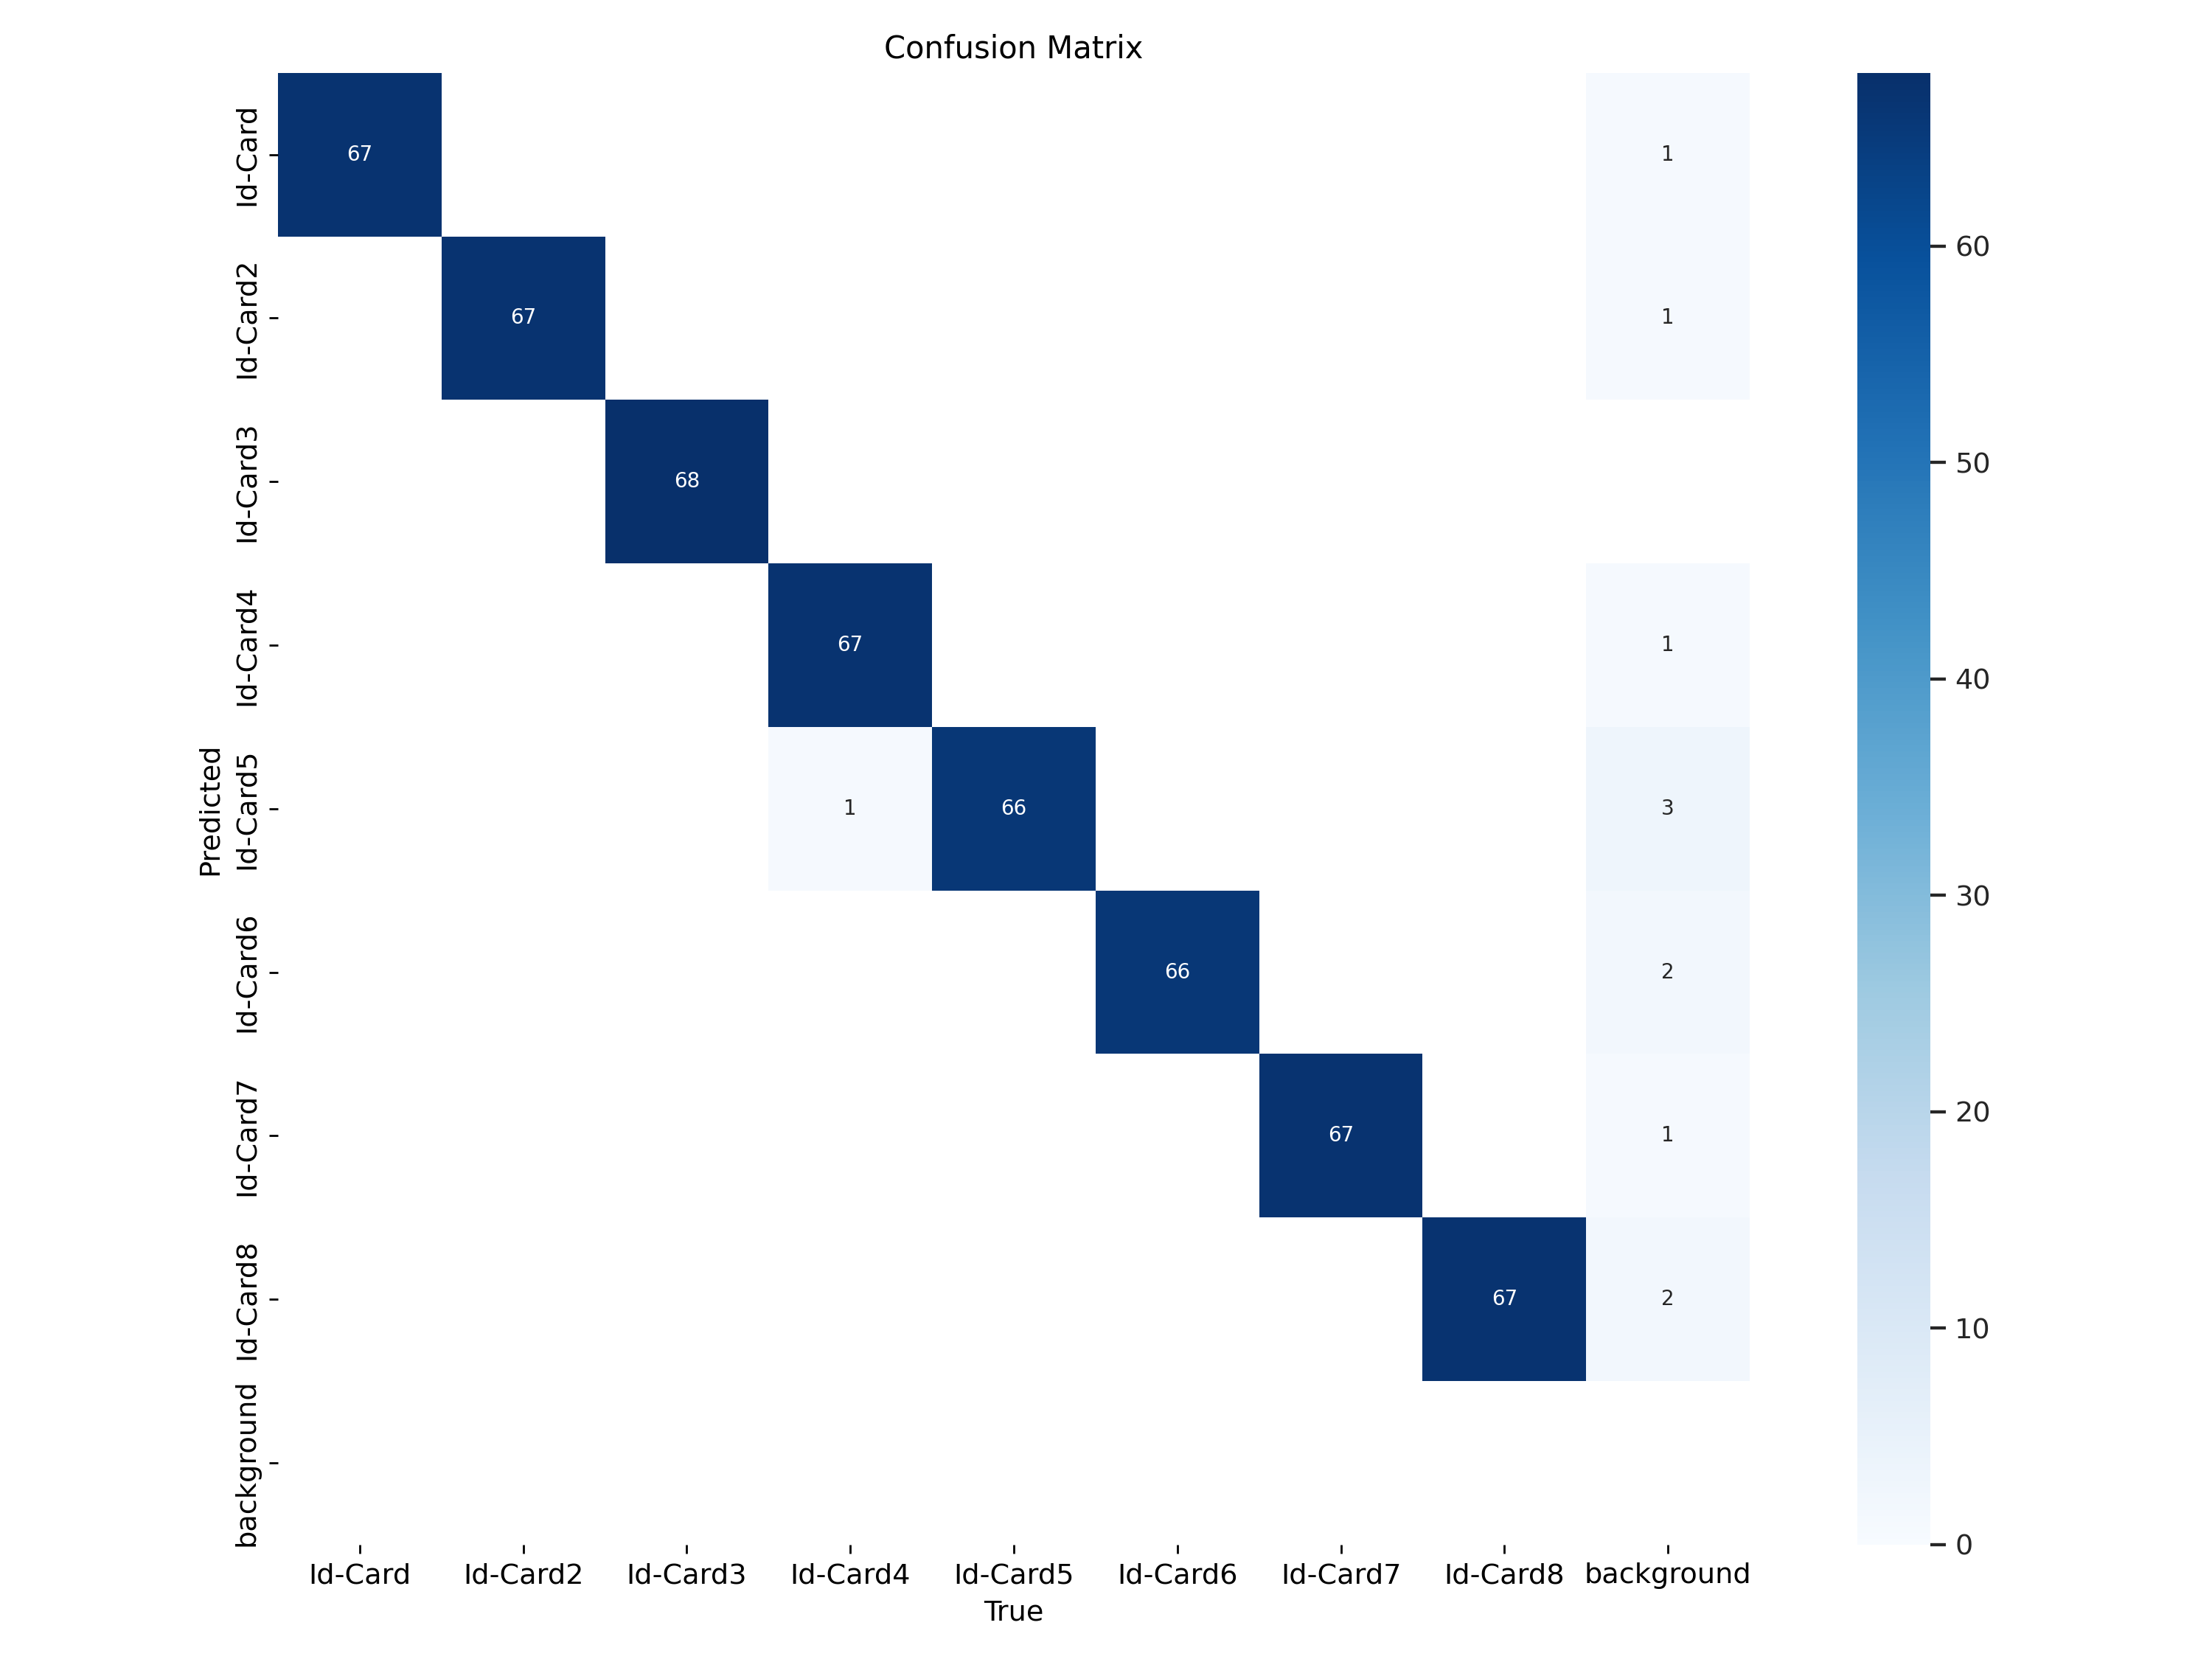

In [15]:
Image(filename=f'runs/detect/train/confusion_matrix.png', width=600)

In [16]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs

image 1/25 /content/IDCardIran-1/test/images/-001_jpg.rf.705fcfa0788a6d29bd8ba10cb1b13416.jpg: 640x640 1 Id-Card, 1 Id-Card2, 1 Id-Card3, 1 Id-Card4, 1 Id-Card5, 1 Id-Card6, 1 Id-Card7, 1 Id-Card8, 16.3ms
image 2/25 /content/IDCardIran-1/test/images/-001_jpg.rf.7cdcad49e556bdc6cf315234a60395e4.jpg: 640x640 1 Id-Card, 1 Id-Card2, 1 Id-Card3, 1 Id-Card4, 1 Id-Card5, 1 Id-Card6, 1 Id-Card7, 1 Id-Card8, 16.3ms
image 3/25 /content/IDCardIran-1/test/images/-1_jpeg.rf.463b30783dbb10d81cd13ee683585886.jpg: 640x640 1 Id-Card, 1 Id-Card2, 1 Id-Card3, 1 Id-Card4, 1 Id-Card5, 1 Id-Card6, 1 Id-Card7, 1 Id-Card8, 16.2ms
image 4/25 /content/IDCardIran-1/test/images/-1_jpg.rf.62523fdbad99ba52925f7bcaf0ebb230.jpg: 640x640 1 Id-Card, 1 Id-Card2, 1 Id-Card3, 1 Id-Card4, 1 Id-Card5, 1 Id-Card6, 1 Id-Card7, 1 Id-Card8, 16.2ms
image 5/25 /conte

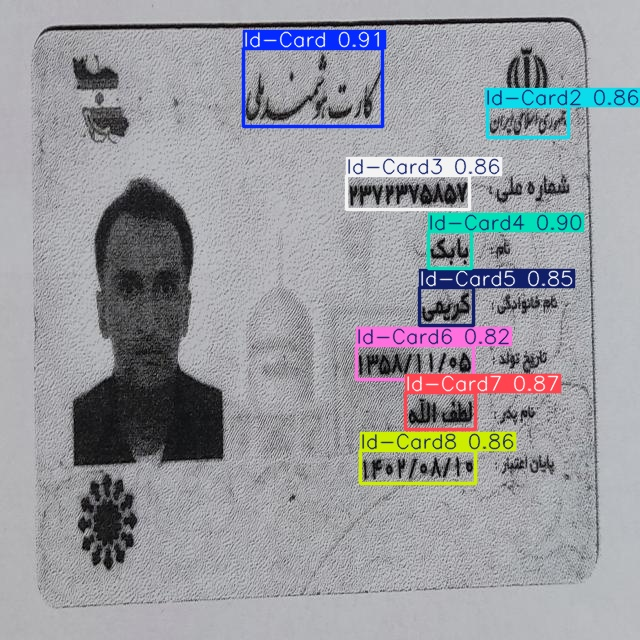

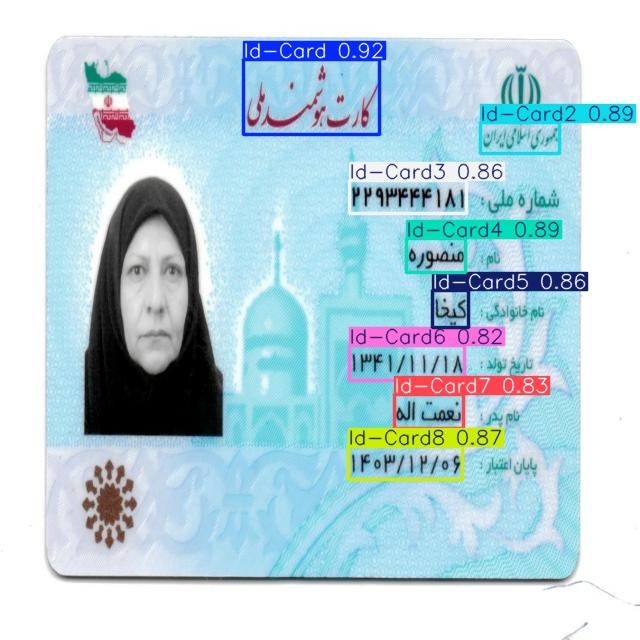

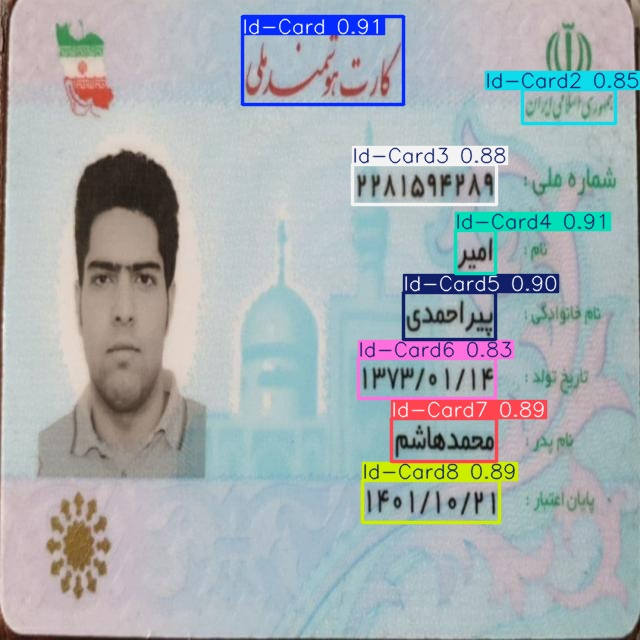

In [18]:
import glob
from IPython.display import display, Image

for img in glob.glob(f'runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=img, height=600))
  print('\n')